In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
URL = "https://www.amazon.com/s?k=iPhone+12+Pro+Max&ref=nb_sb_noss_2"

# Headers for request
HEADERS = {'Accept-Language': 'en-US, en;q=0.5', 
           'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36 Edg/121.0.0.0'}

In [3]:
# HTTP Request
webpage = requests.get(URL, headers=HEADERS)

In [4]:
type(webpage.content)

bytes

In [5]:
# Soup Object containiang all data
soup = BeautifulSoup(webpage.content, "html.parser")

In [6]:
# Fetch links as List of Tag Objects
links = soup.find_all("a", class_="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal")
links

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Apple-iPhone-12-64GB-Black/dp/B08PP5MSVB/ref=sr_1_1?dib=eyJ2IjoiMSJ9.iWkk244t3b8Q2Yp3HaDPide7GqfahN9GF4zPZh6z0lwH8jNKJSh-qtNilKwepPcsB3uese24MfM6CWlYCzk4EVUhBZmI6rnLEfZhZV8VC8efP15imp_6f7u01jIbN1NC83KZmbtJnkQw0K8-NV0Td5blRL7oeFkwYHjRqGn6ma1kg4XepCyFCVVyTIJlGUOe3fqfvnptROKSoKOCOcqFAEA02M7hpFCOYeIOe5nWpDY.aO9DsLLyG7GimlFZIucprgzFxjWpcDL5LGfduuLVMw8&amp;dib_tag=se&amp;keywords=iPhone+12+Pro+Max&amp;qid=1708433710&amp;sr=8-1"><span class="a-size-medium a-color-base a-text-normal">Apple iPhone 12, 64GB, Black - Fully Unlocked (Renewed)</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/OtterBox-Commuter-Case-iPhone-Pro/dp/B08DY9HNYD/ref=sr_1_2?dib=eyJ2IjoiMSJ9.iWkk244t3b8Q2Yp3HaDPide7GqfahN9GF4zPZh6z0lwH8jNKJSh-qtNilKwepPcsB3uese24MfM6CWlYCzk4EVUhBZmI6rnLEfZhZV8VC8efP15imp_6f7u01jIbN1NC83KZmbtJnkQw0K8-NV0Td5blRL7oeFkwYHjRqGn6ma1kg4Xe

In [7]:
link = links[0].get('href')

In [8]:
product_list = "https://amazon.com" + link
product_list

'https://amazon.com/Apple-iPhone-12-64GB-Black/dp/B08PP5MSVB/ref=sr_1_1?dib=eyJ2IjoiMSJ9.iWkk244t3b8Q2Yp3HaDPide7GqfahN9GF4zPZh6z0lwH8jNKJSh-qtNilKwepPcsB3uese24MfM6CWlYCzk4EVUhBZmI6rnLEfZhZV8VC8efP15imp_6f7u01jIbN1NC83KZmbtJnkQw0K8-NV0Td5blRL7oeFkwYHjRqGn6ma1kg4XepCyFCVVyTIJlGUOe3fqfvnptROKSoKOCOcqFAEA02M7hpFCOYeIOe5nWpDY.aO9DsLLyG7GimlFZIucprgzFxjWpcDL5LGfduuLVMw8&dib_tag=se&keywords=iPhone+12+Pro+Max&qid=1708433710&sr=8-1'

In [9]:
new_webpage = requests.get(product_list, headers=HEADERS)

In [10]:
new_webpage

<Response [200]>

In [11]:
# Soup Object containiang all data
new_soup = BeautifulSoup(new_webpage.content, "html.parser")

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
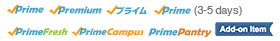

In [12]:
new_soup

In [13]:
new_soup.find("span", attrs={"id":'productTitle'}).text.strip()

'Apple iPhone 12, 64GB, Black - Fully Unlocked (Renewed)'

In [14]:
div_element = new_soup.find("div", attrs={"id": "imgTagWrapperId"})
img_tag = div_element.find("img")
img_src = img_tag.get("src")
img_src

'https://m.media-amazon.com/images/I/51fYXSnSu9L.__AC_SX300_SY300_QL70_ML2_.jpg'

In [15]:
new_soup.find("span", attrs={"class":'a-price a-text-price a-size-base'}).find("span", attrs={"class":'a-offscreen'}).string.strip() 

'$397.76'

In [16]:
new_soup.find("span", attrs={"class":'a-price a-text-price a-size-medium apexPriceToPay'}).find("span", attrs={"class":'a-offscreen'}).string.strip()

'$250.99'

In [17]:
new_soup.find("span", attrs={"class":'a-icon-alt'}).text

'4.2 out of 5 stars'

In [18]:
new_soup.find("span", attrs={"id":'acrCustomerReviewText'}).text.strip()

'17,083 ratings'